#  Construction in Ireland: Cement Data 

CA2 (26/05/2023) - MSc in Data Analytics 
<b>Student ID: 2023063

## Introduction 
write briefing

- Cement data source: https://app.indexbox.io/table/252321h1/372/
- Reddit data source: https://www.reddit.com/r/ireland/comments/xq6miu/10_added_to_concrete_in_the_midst_of_this_crisis/

In [149]:
# Hide/Unhide code

from IPython.display import HTML
"""HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
"""

'HTML(\'\'\'<script>\ncode_show=true; \nfunction code_toggle() {\n if (code_show){\n $(\'div.input\').hide();\n } else {\n $(\'div.input\').show();\n }\n code_show = !code_show\n} \n$( document ).ready(code_toggle);\n</script>\n<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>\'\'\')\n'

## Data Preparation and Visualisation

### Data Preparation

In [150]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore') # To suppress the warnings
%matplotlib inline 

<b>Cement data .tail()

In [151]:
# Read cement data (csv)
cement_data = pd.read_csv("cementdata.csv")

In [152]:
cement_data.head()

,FACTOR,UNITS,2007,2008,2009,2010,2011,2012,2013,2014,2015,Country,Product
0,Consumption Volume,Thousand tons,3563.00,3489.00,1748.00,1704.00,1263.00,48.40,856.00,580.90,667.00,Ireland,Cement
1,Consumption Value,Million USD,264.30,267.40,159.10,160.80,137.10,7.70,101.40,69.20,83.40,Ireland,Cement
2,Production Volume,Thousand tons,4003.00,3900.00,2600.00,2600.00,2103.00,1198.00,2000.00,2000.00,2500.00,Ireland,Cement
3,Production Value,Million USD,146.70,160.20,175.10,191.30,209.00,228.40,234.90,237.60,323.70,Ireland,Cement
4,Import Volume,Thousand tons,684.40,735.40,204.10,138.70,104.30,90.70,92.30,106.70,89.80,Ireland,Cement


<b>Cement data .tail()

In [153]:
cement_data.tail()

,FACTOR,UNITS,2007,2008,2009,2010,2011,2012,2013,2014,2015,Country,Product
125,Import Price,USD per Ton,81.5,97.6,225.8,343,773.8,189.3,330.6,225.8,275.3,Iran,Cement
126,Export Price,USD per Ton,91.9,97.2,76.4,76.5,62.5,62.5,59.6,74.5,59.7,Iran,Cement
127,Per Capita Consumption,Kg per Person,569,608.9,670,653.2,861.6,902.8,862.3,800.3,626.9,Iran,Cement
128,Net Export Volume,Thousand tons,11.1,43.8,631.5,1291,956.9,1227,1927,3951,8851,Iran,Cement
129,Net Export Value,Million USD,1.7,4.2,46.9,96.7,53.4,72.7,103.7,286.9,522,Iran,Cement


<b>Number of countries 

In [154]:
cement_data["Country"].nunique()

10

<b>Country names

In [155]:
cement_data["Country"].unique()

array(['Ireland', 'USA', 'Brazil', 'China', 'Germany', 'Russia',
       'Australia', 'Vietnam', 'Japan', 'Iran'], dtype=object)

<b>Number of variables

In [156]:
cement_data["FACTOR"].nunique()

13

<b>Units

In [157]:
cement_data.iloc[:13,:2]

,FACTOR,UNITS
0,Consumption Volume,Thousand tons
1,Consumption Value,Million USD
2,Production Volume,Thousand tons
3,Production Value,Million USD
4,Import Volume,Thousand tons
5,Import Value,Million USD
6,Export Volume,Thousand tons
7,Export Value,Million USD
8,Import Price,USD per Ton
9,Export Price,USD per Ton


In [158]:
# Define function to split data by country

def cement_df(country, new_df, original_df):
    new_df = original_df[original_df["Country"]==country]
    new_df = new_df.drop({"Country","Product","UNITS"}, axis='columns')
    new_df = new_df.transpose()
    new_df.columns = new_df.iloc[0]
    new_df.drop(index=new_df.index[0], axis=0, inplace=True)
    new_df.reset_index(inplace=True)
    new_df.rename(columns= {"index":"Year"},inplace=True)
    return new_df

<b>Reorganised Cement Data

In [159]:
# Ireland cement data
ireland_cement = cement_df(country="Ireland", new_df="ireland_cement", original_df=cement_data)
ireland_cement["Code"] = "IRL"
ireland_cement

FACTOR,Year,Consumption Volume,Consumption Value,Production Volume,Production Value,Import Volume,Import Value,Export Volume,Export Value,Import Price,Export Price,Per Capita Consumption,Net Export Volume,Net Export Value,Code
0,2007,3563.00,264.30,4003.00,146.70,684.40,65.50,1124.00,105.50,95.70,93.90,810.10,439.60,40.00,IRL
1,2008,3489.00,267.40,3900.00,160.20,735.40,65.40,1146.00,112.00,88.90,97.70,777.20,410.80,46.60,IRL
2,2009,1748.00,159.10,2600.00,175.10,204.10,23.00,1056.00,101.90,112.60,96.50,382.60,852.00,78.90,IRL
3,2010,1704.00,160.80,2600.00,191.30,138.70,13.90,1035.00,104.70,99.90,101.20,368.20,896.50,90.90,IRL
4,2011,1263.00,137.10,2103.00,209.00,104.30,10.90,944.60,94.00,104.60,99.50,270.80,840.30,83.10,IRL
5,2012,48.40,7.70,1198.00,228.40,90.70,10.70,1240.00,111.20,118.50,89.60,10.40,1150.00,100.40,IRL
6,2013,856.00,101.40,2000.00,234.90,92.30,10.00,1236.00,110.60,107.80,89.50,182.80,1144.00,100.60,IRL
7,2014,580.90,69.20,2000.00,237.60,106.70,9.50,1526.00,148.00,88.90,97.00,124.00,1419.00,138.50,IRL
8,2015,667.00,83.40,2500.00,323.70,89.80,7.00,1923.00,145.40,78.10,75.60,141.90,1833.00,138.40,IRL


In [160]:
# United States cement data

usa_cement = cement_df(country="USA", new_df="usa_cement", original_df=cement_data)
usa_cement["Code"] = "USA"
#usa_cement

In [161]:
# Brazil cement data

brazil_cement = cement_df(country="Brazil", new_df="brazil_cement", original_df=cement_data)
brazil_cement["Code"] = "BRA"
#brazil_cement

In [162]:
# China cement data

china_cement = cement_df(country="China", new_df="china_cement", original_df=cement_data)
china_cement["Code"] = "CHN"
#china_cement

In [163]:
# Germany cement data

germany_cement = cement_df(country="Germany", new_df="germany_cement", original_df=cement_data)
germany_cement["Code"] = "DEU"
#germany_cement

In [164]:
# Russia cement data

russia_cement = cement_df(country="Russia", new_df="russia_cement", original_df=cement_data)
russia_cement["Code"] = "RUS"
#russia_cement

In [165]:
# Australia cement data

australia_cement = cement_df(country="Australia", new_df="australia_cement", original_df=cement_data)
australia_cement["Code"] = "AUS"
#australia_cement

In [166]:
# Vietnam cement data

vietnam_cement = cement_df(country="Vietnam", new_df="vietnam_cement", original_df=cement_data)
vietnam_cement["Code"] = "VNM"
#vietnam_cement

In [167]:
# Japan cement data

japan_cement = cement_df(country="Japan", new_df="japan_cement", original_df=cement_data)
japan_cement["Code"] = "JPN"
#japan_cement

In [168]:
# Iran cement data

iran_cement = cement_df(country="Iran", new_df="iran_cement", original_df=cement_data)
iran_cement["Code"] = "IRN"
#iran_cement

<b> Check Data type

In [169]:
# Check data type
ireland_cement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Year                    9 non-null      object
 1   Consumption Volume      9 non-null      object
 2   Consumption Value       9 non-null      object
 3   Production Volume       9 non-null      object
 4   Production Value        9 non-null      object
 5   Import Volume           9 non-null      object
 6   Import Value            9 non-null      object
 7   Export Volume           9 non-null      object
 8   Export Value            9 non-null      object
 9   Import Price            9 non-null      object
 10  Export Price            9 non-null      object
 11  Per Capita Consumption  9 non-null      object
 12  Net Export Volume       9 non-null      object
 13  Net Export Value        9 non-null      object
 14  Code                    9 non-null      object
dtypes: object(

In [170]:
# Dtype is object.
# Create a function to convert object to number
def convert_2num(df):
    df["Year"] = pd.to_numeric(df["Year"])
    df["Consumption Volume"] = pd.to_numeric(df["Consumption Volume"])
    df["Consumption Value"] = pd.to_numeric(df["Consumption Value"])
    df["Production Volume"] = pd.to_numeric(df["Production Volume"])
    df["Production Value"] = pd.to_numeric(df["Production Value"])
    df["Import Volume"] = pd.to_numeric(df["Import Volume"])
    df["Import Value"] = pd.to_numeric(df["Import Value"])
    df["Export Volume"] = pd.to_numeric(df["Export Volume"])
    df["Export Value"] = pd.to_numeric(df["Export Value"])
    df["Import Price"] = pd.to_numeric(df["Import Price"])
    df["Export Price"] = pd.to_numeric(df["Export Price"])
    df["Per Capita Consumption"] = pd.to_numeric(df["Per Capita Consumption"])

# Use the function to all countries 
convert_2num(ireland_cement)
convert_2num(usa_cement)
convert_2num(brazil_cement)
convert_2num(china_cement)
convert_2num(germany_cement)
convert_2num(russia_cement)
convert_2num(australia_cement)
convert_2num(vietnam_cement)
convert_2num(japan_cement)
convert_2num(iran_cement)

<b>.describe() after converting dtype to number

In [171]:
ireland_cement.describe()

FACTOR,Year,Consumption Volume,Consumption Value,Production Volume,Production Value,Import Volume,Import Value,Export Volume,Export Value,Import Price,Export Price,Per Capita Consumption
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2011.000000,1546.588889,138.933333,2544.888889,211.877778,249.600000,23.988889,1247.844444,114.811111,99.444444,93.388889,340.888889
std,2.738613,1245.610124,86.375865,906.482687,53.235227,263.742957,23.934726,302.733658,18.922833,12.868383,7.793017,282.572333
min,2007.000000,48.400000,7.700000,1198.000000,146.700000,89.800000,7.000000,944.600000,94.000000,78.100000,75.600000,10.400000
25%,2009.000000,667.000000,83.400000,2000.000000,175.100000,92.300000,10.000000,1056.000000,104.700000,88.900000,89.600000,141.900000
50%,2011.000000,1263.000000,137.100000,2500.000000,209.000000,106.700000,10.900000,1146.000000,110.600000,99.900000,96.500000,270.800000
75%,2013.000000,1748.000000,160.800000,2600.000000,234.900000,204.100000,23.000000,1240.000000,112.000000,107.800000,97.700000,382.600000
max,2015.000000,3563.000000,267.400000,4003.000000,323.700000,735.400000,65.500000,1923.000000,148.000000,118.500000,101.200000,810.100000


<b>New dataframe with merged and cleaned cement data (Ireland, United States, Brazil, China, Germany, Russia, Australia, Vietnam, Japan and Iran)

In [172]:
# Merge data

cement_merge = pd.merge(ireland_cement,usa_cement, how="outer")
cement_merge = pd.merge(cement_merge,brazil_cement, how="outer")
cement_merge = pd.merge(cement_merge,china_cement, how="outer")
cement_merge = pd.merge(cement_merge,germany_cement, how="outer")
cement_merge = pd.merge(cement_merge,russia_cement, how="outer")
cement_merge = pd.merge(cement_merge,australia_cement, how="outer")
cement_merge = pd.merge(cement_merge,vietnam_cement, how="outer")
cement_merge = pd.merge(cement_merge,japan_cement, how="outer")
cement_merge = pd.merge(cement_merge,iran_cement, how="outer")

cement_merge

FACTOR,Year,Consumption Volume,Consumption Value,Production Volume,Production Value,Import Volume,Import Value,Export Volume,Export Value,Import Price,Export Price,Per Capita Consumption,Net Export Volume,Net Export Value,Code
0,2007,3563.0,264.3,4003.0,146.7,684.4,65.5,1124.0,105.5,95.7,93.9,810.1,439.60,40.00,IRL
1,2008,3489.0,267.4,3900.0,160.2,735.4,65.4,1146.0,112.0,88.9,97.7,777.2,410.80,46.60,IRL
2,2009,1748.0,159.1,2600.0,175.1,204.1,23.0,1056.0,101.9,112.6,96.5,382.6,852.00,78.90,IRL
3,2010,1704.0,160.8,2600.0,191.3,138.7,13.9,1035.0,104.7,99.9,101.2,368.2,896.50,90.90,IRL
4,2011,1263.0,137.1,2103.0,209.0,104.3,10.9,944.6,94.0,104.6,99.5,270.8,840.30,83.10,IRL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2011,65043.0,4129.0,66000.0,3394.0,9.0,7.0,965.9,60.4,773.8,62.5,861.6,956.9,53.4,IRN
86,2012,69023.0,4610.0,70250.0,3903.0,31.7,6.0,1258.0,78.7,189.3,62.5,902.8,1227,72.7,IRN
87,2013,66773.0,4984.0,68700.0,4489.0,41.1,13.6,1968.0,117.2,330.6,59.6,862.3,1927,103.7,IRN
88,2014,62749.0,5290.0,66700.0,5162.0,47.9,10.8,3999.0,297.8,225.8,74.5,800.3,3951,286.9,IRN


### Data visualisation

<b> Cement Consumption Volume (thousand tons) 

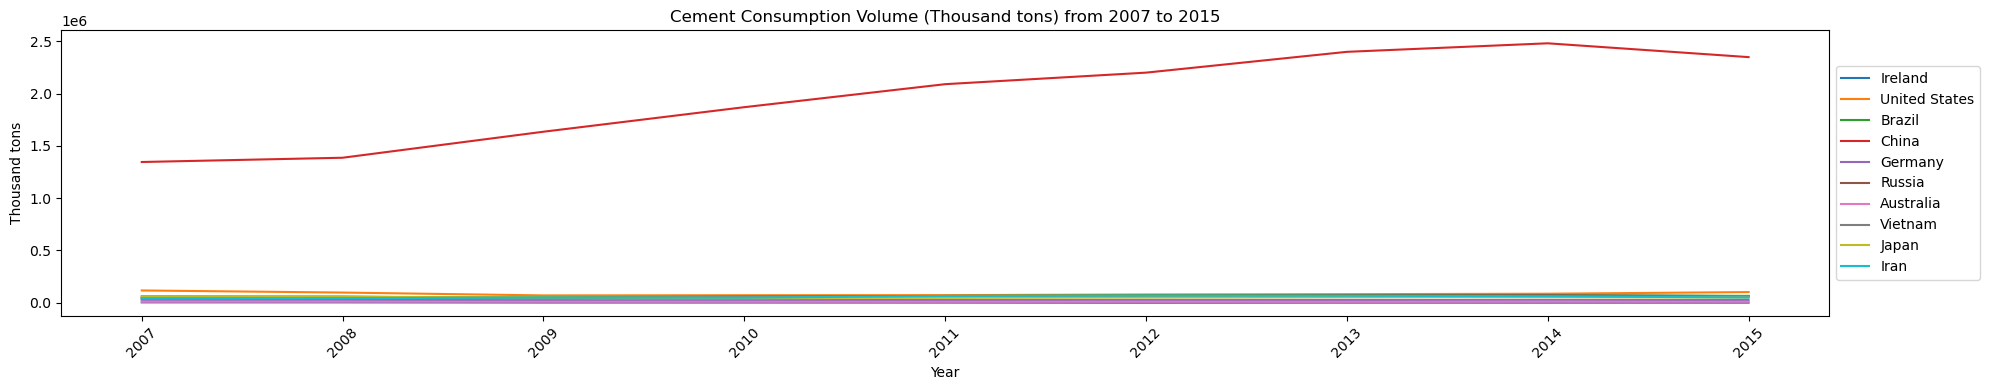

In [173]:
# Plot Cement Consumption Volume (Thousand tons) 
# Create figure and set of subplots
fig, ax = plt.subplots()

ax.plot(cement_merge[cement_merge["Code"]=="IRL"]["Year"], cement_merge[cement_merge["Code"]=="IRL"]["Consumption Volume"], label="Ireland")
ax.plot(cement_merge[cement_merge["Code"]=="USA"]["Year"], cement_merge[cement_merge["Code"]=="USA"]["Consumption Volume"], label="United States")
ax.plot(cement_merge[cement_merge["Code"]=="BRA"]["Year"], cement_merge[cement_merge["Code"]=="BRA"]["Consumption Volume"], label="Brazil")
ax.plot(cement_merge[cement_merge["Code"]=="CHN"]["Year"], cement_merge[cement_merge["Code"]=="CHN"]["Consumption Volume"], label="China")
ax.plot(cement_merge[cement_merge["Code"]=="DEU"]["Year"], cement_merge[cement_merge["Code"]=="DEU"]["Consumption Volume"], label="Germany")
ax.plot(cement_merge[cement_merge["Code"]=="RUS"]["Year"], cement_merge[cement_merge["Code"]=="RUS"]["Consumption Volume"], label="Russia")
ax.plot(cement_merge[cement_merge["Code"]=="AUS"]["Year"], cement_merge[cement_merge["Code"]=="AUS"]["Consumption Volume"], label="Australia")
ax.plot(cement_merge[cement_merge["Code"]=="VNM"]["Year"], cement_merge[cement_merge["Code"]=="VNM"]["Consumption Volume"], label="Vietnam")
ax.plot(cement_merge[cement_merge["Code"]=="JPN"]["Year"], cement_merge[cement_merge["Code"]=="JPN"]["Consumption Volume"], label="Japan")
ax.plot(cement_merge[cement_merge["Code"]=="IRN"]["Year"], cement_merge[cement_merge["Code"]=="IRN"]["Consumption Volume"], label="Iran")


# Config graphic
plt.rc("figure", autolayout=True, figsize=(20, 4))
plt.title("Cement Consumption Volume (Thousand tons) from 2007 to 2015")
plt.xlabel("Year")
plt.ylabel("Thousand tons")
plt.xticks(rotation=45)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display graphic
plt.show()

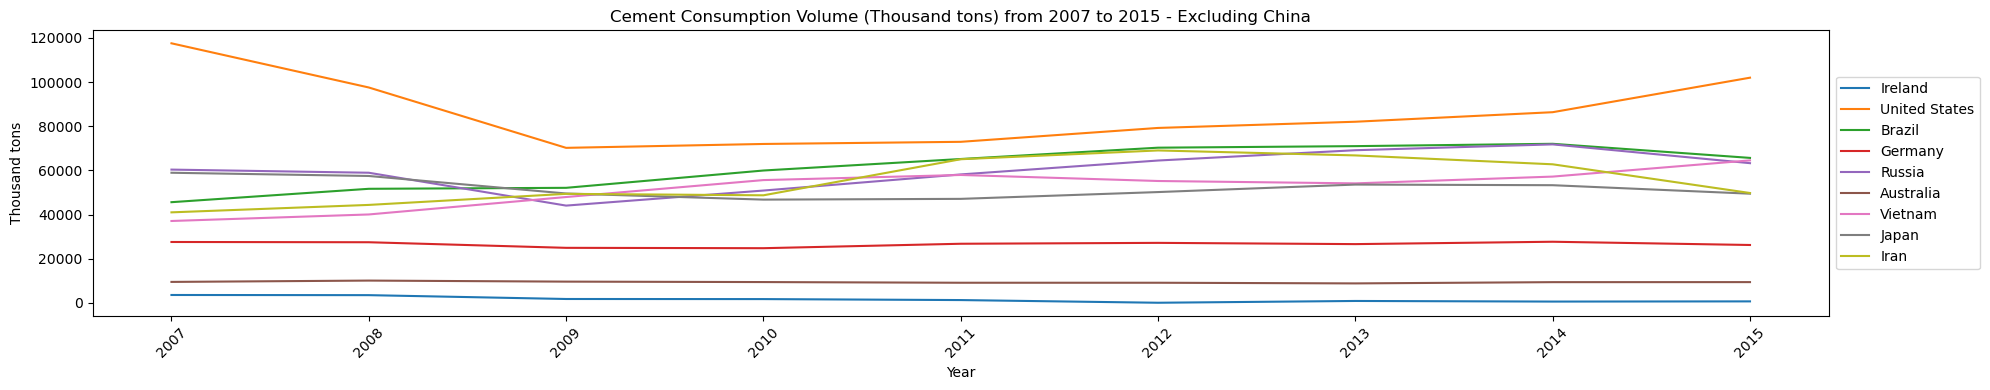

In [174]:
# Plot Cement Consumption Volume (Thousand tons) excluding China
# Create figure and set of subplots
fig, ax = plt.subplots()

ax.plot(cement_merge[cement_merge["Code"]=="IRL"]["Year"], cement_merge[cement_merge["Code"]=="IRL"]["Consumption Volume"], label="Ireland")
ax.plot(cement_merge[cement_merge["Code"]=="USA"]["Year"], cement_merge[cement_merge["Code"]=="USA"]["Consumption Volume"], label="United States")
ax.plot(cement_merge[cement_merge["Code"]=="BRA"]["Year"], cement_merge[cement_merge["Code"]=="BRA"]["Consumption Volume"], label="Brazil")
#ax.plot(cement_merge[cement_merge["Code"]=="CHN"]["Year"], cement_merge[cement_merge["Code"]=="CHN"]["Consumption Volume"], label="China")
ax.plot(cement_merge[cement_merge["Code"]=="DEU"]["Year"], cement_merge[cement_merge["Code"]=="DEU"]["Consumption Volume"], label="Germany")
ax.plot(cement_merge[cement_merge["Code"]=="RUS"]["Year"], cement_merge[cement_merge["Code"]=="RUS"]["Consumption Volume"], label="Russia")
ax.plot(cement_merge[cement_merge["Code"]=="AUS"]["Year"], cement_merge[cement_merge["Code"]=="AUS"]["Consumption Volume"], label="Australia")
ax.plot(cement_merge[cement_merge["Code"]=="VNM"]["Year"], cement_merge[cement_merge["Code"]=="VNM"]["Consumption Volume"], label="Vietnam")
ax.plot(cement_merge[cement_merge["Code"]=="JPN"]["Year"], cement_merge[cement_merge["Code"]=="JPN"]["Consumption Volume"], label="Japan")
ax.plot(cement_merge[cement_merge["Code"]=="IRN"]["Year"], cement_merge[cement_merge["Code"]=="IRN"]["Consumption Volume"], label="Iran")


# Config graphic
plt.rc("figure", autolayout=True, figsize=(20, 4))
plt.title("Cement Consumption Volume (Thousand tons) from 2007 to 2015 - Excluding China")
plt.xlabel("Year")
plt.ylabel("Thousand tons")
plt.xticks(rotation=45)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display graphic
plt.show()

<b>Cement Production Value (Million USD) - Interactive plot

In [175]:
# Interactive map graph: Cement Production Value (Million USD)

fig = px.choropleth(cement_merge, locations="Code",
                    color="Production Value", 
                    hover_name="Code", 
                    # column to add to hover information
                    animation_frame="Year", 
                    # column on which to animate
                    color_continuous_scale=[[0, 'rgb(240,240,240)'],
                      [0.10, 'rgb(252, 244, 83)'],
                      [0.2, 'rgb(255, 145, 36)'],
                      [0.50, 'rgb(255, 85, 28)'],
                      [1, 'rgb(227,26,28,0.5)']])
                    
fig.update_layout(
    # add a title text for the plot
    title_text = 'Cement Production Value (Million USD)',
    # set projection style for the plot
    geo = dict(projection={'type':'natural earth'}) 
    # by default, projection type is set to 'equirectangular'
)
fig.show()


<b>Cement Per Capita Consumption (kg/person) - Interactive plot

In [176]:
# Interactive scatterplot map graph: Cement Per Capita Consumption (kg/person)

fig = px.scatter_geo(cement_merge, 
                    locations="Code", 
                     # name of column which contains state codes
                    size="Per Capita Consumption", 
                     # name of column which contains aggregate value to visualize
                    hover_name="Code",
                    size_max=40,
                    animation_frame="Year",)
                    
fig.update_layout(
    # add a title text for the plot
    title_text = 'Cement Per Capita Consumption (kg/person)',
    # limit plot scope to USA
    geo = dict(projection={'type':'natural earth'})
)
fig.show()


<b>Cement Import Price (USD per ton) - Interactive plot

In [177]:
# Interactive scatterplot map graph: Cement Import Price (USD per ton)

fig = px.scatter_geo(cement_merge, 
                    locations="Code", 
                     # name of column which contains state codes
                    size="Import Price", 
                     # name of column which contains aggregate value to visualize
                    hover_name="Code",
                    size_max=40,
                    animation_frame="Year",)
                    
fig.update_layout(
    # add a title text for the plot
    title_text = 'Cement Import Price (USD per ton)',
    # limit plot scope to USA
    geo = dict(projection={'type':'natural earth'})
)
fig.show()


<b>Cement Import Price (USD per ton) - Static plot

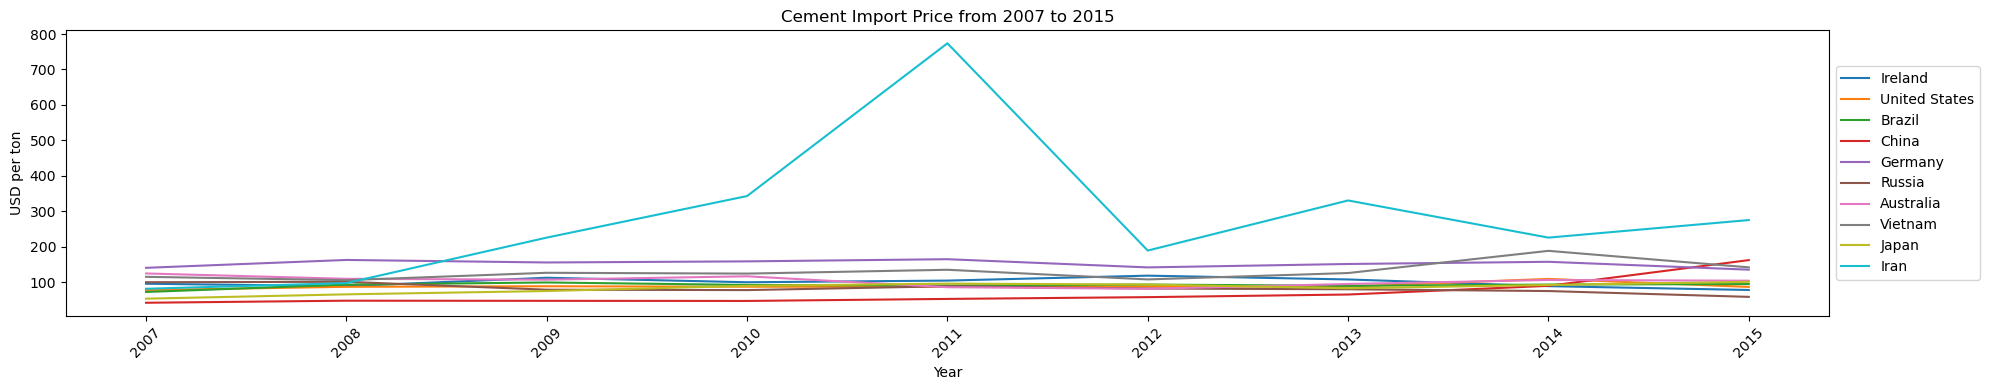

In [178]:
# Plot Cement Import Price from 2007 to 2015
# Create figure and set of subplots
fig, ax = plt.subplots()

ax.plot(cement_merge[cement_merge["Code"]=="IRL"]["Year"], cement_merge[cement_merge["Code"]=="IRL"]["Import Price"], label="Ireland")
ax.plot(cement_merge[cement_merge["Code"]=="USA"]["Year"], cement_merge[cement_merge["Code"]=="USA"]["Import Price"], label="United States")
ax.plot(cement_merge[cement_merge["Code"]=="BRA"]["Year"], cement_merge[cement_merge["Code"]=="BRA"]["Import Price"], label="Brazil")
ax.plot(cement_merge[cement_merge["Code"]=="CHN"]["Year"], cement_merge[cement_merge["Code"]=="CHN"]["Import Price"], label="China")
ax.plot(cement_merge[cement_merge["Code"]=="DEU"]["Year"], cement_merge[cement_merge["Code"]=="DEU"]["Import Price"], label="Germany")
ax.plot(cement_merge[cement_merge["Code"]=="RUS"]["Year"], cement_merge[cement_merge["Code"]=="RUS"]["Import Price"], label="Russia")
ax.plot(cement_merge[cement_merge["Code"]=="AUS"]["Year"], cement_merge[cement_merge["Code"]=="AUS"]["Import Price"], label="Australia")
ax.plot(cement_merge[cement_merge["Code"]=="VNM"]["Year"], cement_merge[cement_merge["Code"]=="VNM"]["Import Price"], label="Vietnam")
ax.plot(cement_merge[cement_merge["Code"]=="JPN"]["Year"], cement_merge[cement_merge["Code"]=="JPN"]["Import Price"], label="Japan")
ax.plot(cement_merge[cement_merge["Code"]=="IRN"]["Year"], cement_merge[cement_merge["Code"]=="IRN"]["Import Price"], label="Iran")


# Config graphic
plt.rc("figure", autolayout=True, figsize=(20, 4))
plt.title("Cement Import Price from 2007 to 2015")
plt.xlabel("Year")
plt.ylabel("USD per ton")
plt.xticks(rotation=45)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display graphic
plt.show()

<b>Cement Export Price (USD per ton) - Interactive plot

In [179]:
# Interactive scatterplot map graph: Cement Export Price (USD per ton)

fig = px.scatter_geo(cement_merge, 
                    locations="Code", 
                     # name of column which contains state codes
                    size="Export Price", 
                     # name of column which contains aggregate value to visualize
                    hover_name="Code",
                    size_max=40,
                    animation_frame="Year",)
                    
fig.update_layout(
    # add a title text for the plot
    title_text = 'Cement Export Price (USD per ton)',
    # limit plot scope to USA
    geo = dict(projection={'type':'natural earth'})
)
fig.show()

<b>Cement Export Price (USD per ton) - Static plot

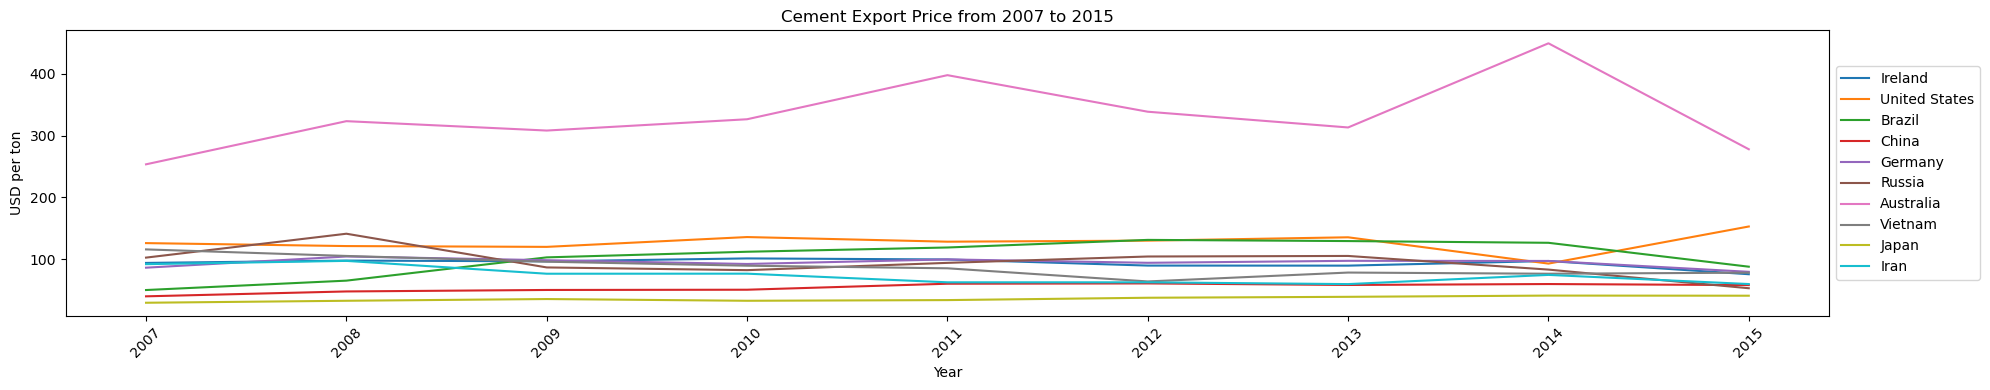

In [180]:
# Plot Cement Export Price (USD per ton) from 2007 to 2015
# Create figure and set of subplots
fig, ax = plt.subplots()

ax.plot(cement_merge[cement_merge["Code"]=="IRL"]["Year"], cement_merge[cement_merge["Code"]=="IRL"]["Export Price"], label="Ireland")
ax.plot(cement_merge[cement_merge["Code"]=="USA"]["Year"], cement_merge[cement_merge["Code"]=="USA"]["Export Price"], label="United States")
ax.plot(cement_merge[cement_merge["Code"]=="BRA"]["Year"], cement_merge[cement_merge["Code"]=="BRA"]["Export Price"], label="Brazil")
ax.plot(cement_merge[cement_merge["Code"]=="CHN"]["Year"], cement_merge[cement_merge["Code"]=="CHN"]["Export Price"], label="China")
ax.plot(cement_merge[cement_merge["Code"]=="DEU"]["Year"], cement_merge[cement_merge["Code"]=="DEU"]["Export Price"], label="Germany")
ax.plot(cement_merge[cement_merge["Code"]=="RUS"]["Year"], cement_merge[cement_merge["Code"]=="RUS"]["Export Price"], label="Russia")
ax.plot(cement_merge[cement_merge["Code"]=="AUS"]["Year"], cement_merge[cement_merge["Code"]=="AUS"]["Export Price"], label="Australia")
ax.plot(cement_merge[cement_merge["Code"]=="VNM"]["Year"], cement_merge[cement_merge["Code"]=="VNM"]["Export Price"], label="Vietnam")
ax.plot(cement_merge[cement_merge["Code"]=="JPN"]["Year"], cement_merge[cement_merge["Code"]=="JPN"]["Export Price"], label="Japan")
ax.plot(cement_merge[cement_merge["Code"]=="IRN"]["Year"], cement_merge[cement_merge["Code"]=="IRN"]["Export Price"], label="Iran")


# Config graphic
plt.rc("figure", autolayout=True, figsize=(20, 4))
plt.title("Cement Export Price from 2007 to 2015")
plt.xlabel("Year")
plt.ylabel("USD per ton")
plt.xticks(rotation=45)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display graphic
plt.show()

## Statistical Analysis

### Testing Hypothesis

Steps to perform hypothesis tests:
- State the null ($H_0$) and alternative ($H_A$) hypotheses.
- Select an appropriate test (and corresponding Python function) to perform.
- Run the code.
- Make a decision/conclusion, based on the p-value.
- Summarise the results.

Therefore,

- $H_0$ is mu0 = muA
- $H_A$ is mu0 =/= muA
- $\alpha$ <= 0.05 means reject $H_0$ 
- $\alpha$ > 0.05 means fail to reject $H_0$ 

### Parametric tests
Tests that make assumptions about the parameters of the population distribution from which the sample is drawn.

Performed tests in this section:
- ANOVA
- Tukey-Kramer
- Two-sample t-test
- Two-sample KS test

### ANOVA (Analysis of Variance) 
It is the generalisation of the two-sample t-test. It allows to test the mean of three or more groups.
- Cement Per Capita Consumption test between Ireland, United States, Brazil, China, Germany, Russia, Australia, Vietnam, Japan and Iran.

In [181]:
# Perform oneway ANOVA test 
stats.f_oneway(
 *(cement_merge.loc[cement_merge['Code']==country, 'Per Capita Consumption'] 
 for country in cement_merge['Code'].unique())
 )

F_onewayResult(statistic=52.36524795597824, pvalue=7.25805477761559e-30)

p-value is a very small value (close to zero), which means reject ($H_0$) at least one mu is different. Tukey-Kramer analysis will be performed to see which of the means differ from each other.

### Tukey-Kramer Analysis
- Cement Per Capita Consumption test between Ireland, United States, Brazil, China, Germany, Russia, Australia, Vietnam, Japan and Iran.

In [182]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's test
tukey = pairwise_tukeyhsd(endog=cement_merge['Per Capita Consumption'],
                          groups=cement_merge['Code'],
                          alpha=0.05) # default alpha

# Display results
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------
   AUS    BRA  -110.3889 0.8137   -326.773  105.9952  False
   AUS    CHN   988.9778    0.0   772.5937 1205.3619   True
   AUS    DEU   -91.9556 0.9289  -308.3396  124.4285  False
   AUS    IRL   -78.2444 0.9738  -294.6285  138.1396  False
   AUS    IRN      309.2 0.0005    92.8159  525.5841   True
   AUS    JPN   -15.6667    1.0  -232.0508  200.7174  False
   AUS    RUS     0.0111    1.0   -216.373  216.3952  False
   AUS    USA  -139.9333 0.5298  -356.3174   76.4508  False
   AUS    VNM   161.4889 0.3233   -54.8952   377.873  False
   BRA    CHN  1099.3667    0.0   882.9826 1315.7508   True
   BRA    DEU    18.4333    1.0  -197.9508  234.8174  False
   BRA    IRL    32.1444    1.0  -184.2396  248.5285  False
   BRA    IRN   419.5889    0.0   203.2048   635.973   True
   BRA    JPN    94.7222 0.9158  -121.66

meandiff represents the mean difference between group1 and group2. 

For instance, DEU-IRL meandiff = 13.71 means that the Per Capita Consumption mean in Germany is bigger than Per Capita Consumption in Ireland. The confidence interval is wide and it includes zero, because is goes from a negative value (lower) to a positive value (upper). <b>There is no enough evidence that there is difference between IRL and DEU in termn of Per Capital Consumption</b> (reject=False).

However, it is different to analyse China and Ireland (CHN-IRL), the confidence interval does not include zero, therefore it means <b>there is difference between IRL and CHN in terms of Per Capita Consumption, so it is possible to reject $H_0$</b> (reject=True).

### Two-sample t-tests:

Tests a hypothesis about the means and check if there is enough evidence to include this.
- Cement Per Capita Consumption between Ireland and Germany.

In [183]:
# Split per capita consumption data by country 
percapitacon = cement_merge.iloc[:,11:15]
percapitacon = percapitacon.drop({"Net Export Volume","Net Export Value"},axis='columns')
percapitacon_irl = percapitacon[(percapitacon['Code'] == 'IRL')]
percapitacon_usa = percapitacon[(percapitacon['Code'] == 'USA')]
percapitacon_bra = percapitacon[(percapitacon['Code'] == 'BRA')]
percapitacon_chn = percapitacon[(percapitacon['Code'] == 'CHN')]
percapitacon_deu = percapitacon[(percapitacon['Code'] == 'DEU')]
percapitacon_rus = percapitacon[(percapitacon['Code'] == 'RUS')]
percapitacon_aus = percapitacon[(percapitacon['Code'] == 'AUS')]
percapitacon_vnm = percapitacon[(percapitacon['Code'] == 'VNM')]
percapitacon_jpn = percapitacon[(percapitacon['Code'] == 'JPN')]
percapitacon_irn = percapitacon[(percapitacon['Code'] == 'IRN')]

In [184]:
# Subsets - Comparing Per Capita Consumption between Ireland and Germany
# Perform the two-sample t-test with equal variances:

stats.ttest_ind(a=percapitacon_irl['Per Capita Consumption'], b=percapitacon_deu['Per Capita Consumption'])

Ttest_indResult(statistic=0.14541286530945666, pvalue=0.8862010280297429)

Two-sample t-test tests a hypothesis about the means. Testing Ireland and Germany, pvalue greater than 0.05 means it <b>fails to reject $H_0$, there is no enough evidence that the means are different.

In [185]:
# Subsets - Comparing Per Capita Consumption between Ireland and China
# Perform the two-sample t-test with equal variances:

stats.ttest_ind(a=percapitacon_irl['Per Capita Consumption'], b=percapitacon_chn['Per Capita Consumption'])

Ttest_indResult(statistic=-7.886674327765629, pvalue=6.669721239632589e-07)

Testing Ireland and China with two-sample t-test returned a pvalue less than 0.05, meaning it <b>rejects  $𝐻_0$, the means are different.

### Two-sample KS test:
To test if two samples come from the same distribution.
- Cement Per Capita Consumption between Ireland and Iran.

In [186]:
stats.ks_2samp(percapitacon_irl["Per Capita Consumption"], percapitacon_irn["Per Capita Consumption"])

KstestResult(statistic=0.7777777777777778, pvalue=0.006293706293706292)

It is possible to conclude that the two samples of per capita consumption do not come from the same population/distribution. There is sufficient evidence to reject  $H_0$.

### Non-parametric tests: 
Non-parametric tests are tests which don't involve assumptions about the distributions of X (and Y).

Performed tests in this section:
- The Kruskal-Wallis test
- The Mann Whitney U test

### The Kruskal-Wallis Test
This is a non-parametric version of the one-way ANOVA test.

In [187]:
# Kruskal-Wallis Test:
stats.kruskal(
 *(cement_merge.loc[cement_merge['Code']==country, 'Per Capita Consumption'] 
 for country in cement_merge['Code'].unique())
)

KruskalResult(statistic=69.48970729329298, pvalue=1.917041484632487e-11)

p-value is a very small value (close to zero), which means reject $𝐻_0$, at least one mu is different. 

### The Mann Whitney U test:

Non-parametric test equivalent to two-sample t-test. 
- Cement Per Capita Consumption between Ireland and China.

In [188]:
stats.mannwhitneyu(x=percapitacon_irl['Per Capita Consumption'], y=percapitacon_chn['Per Capita Consumption'], method="exact")

MannwhitneyuResult(statistic=0.0, pvalue=4.113533525298231e-05)

The Mann Whitney U test tests a hypothesis about the medians. pvalue score is less than 0.05, therefore it is possible to reject $H_0$, the medians are different.

### Cement data Per Capita Consumption Boxplot visualisation with mean values

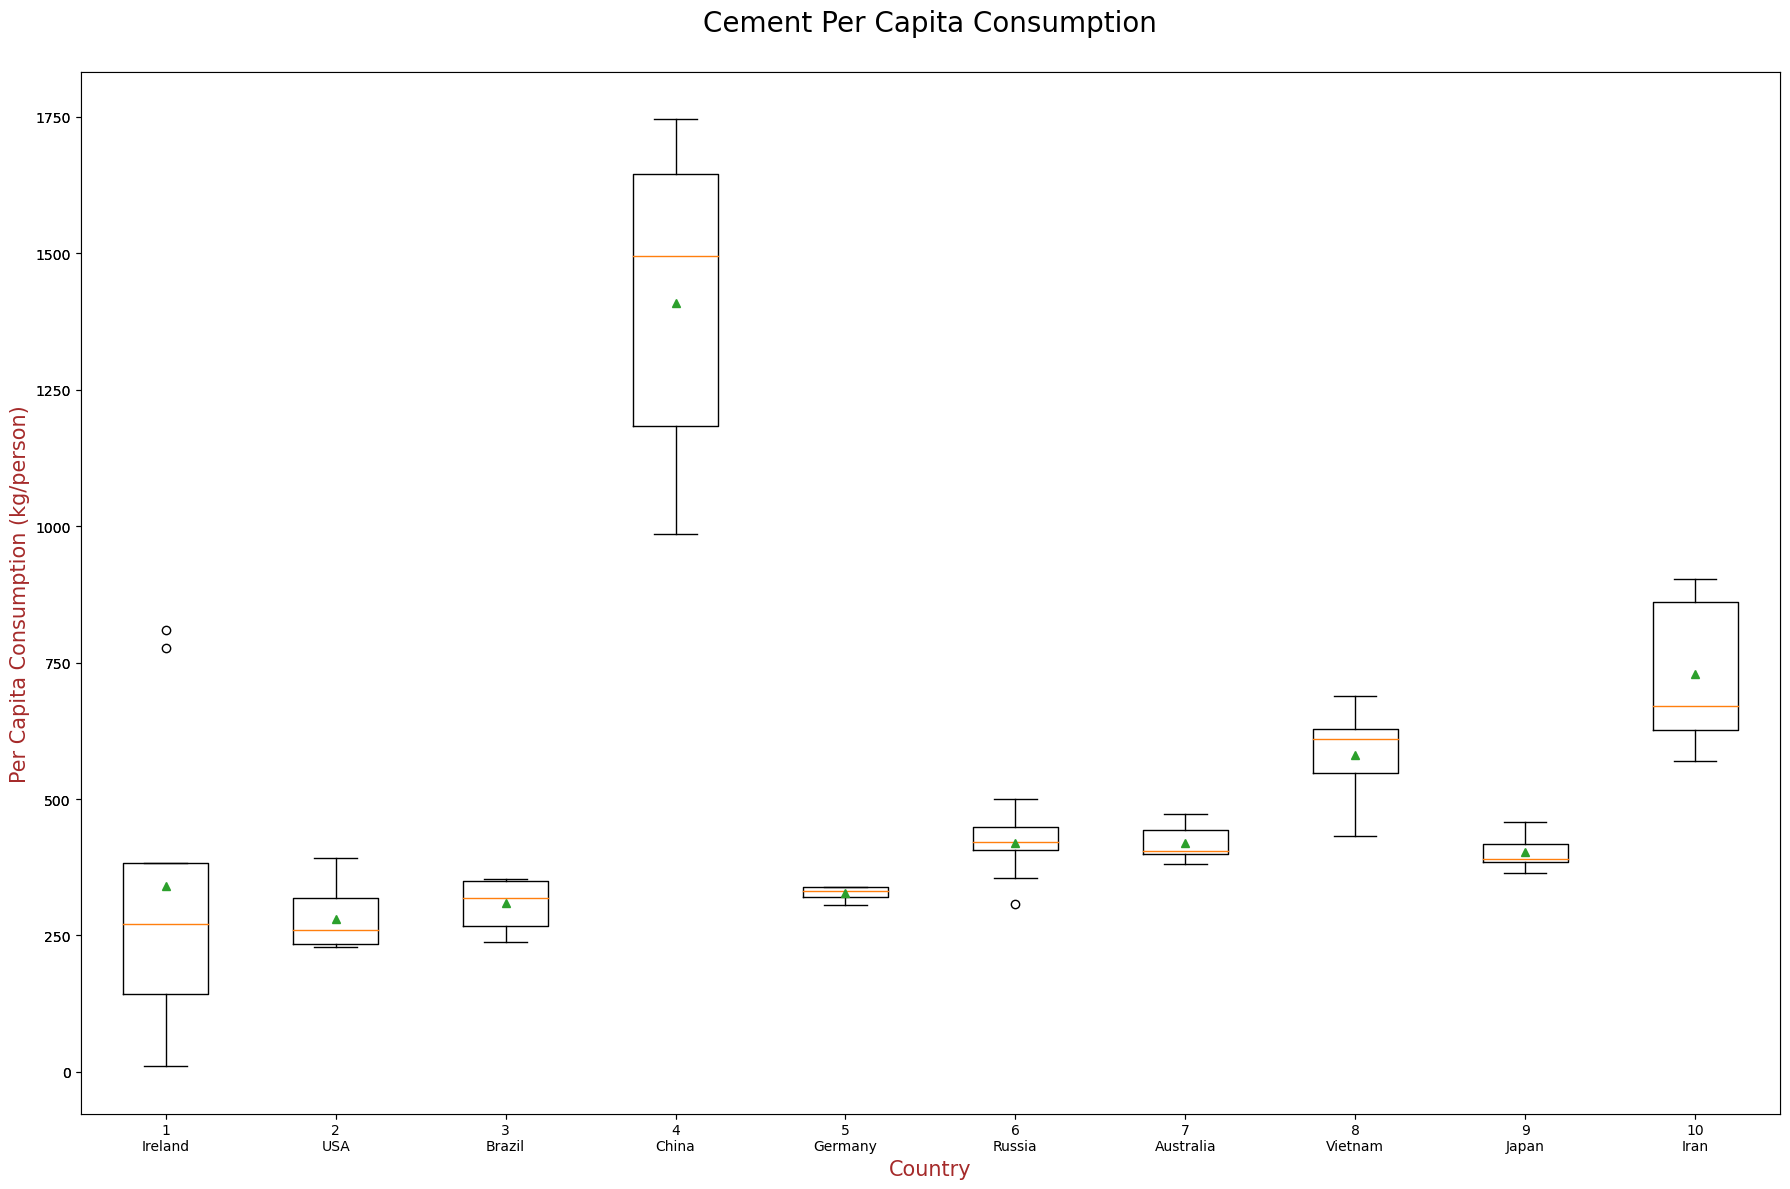

In [189]:
# Per Capita Consumption boxplot
plotdata = [*(cement_merge.loc[cement_merge['Code']==country, 'Per Capita Consumption'] 
 for country in cement_merge['Code'].unique())]

# Multiple boxplot visualisation
fig = plt.figure(figsize = [18,12])
plt.boxplot(plotdata)
ax = fig.add_subplot(111)
bp = ax.boxplot(plotdata, showmeans=True) #show mean values

plt.xticks((1,2,3,4,5,6,7,8,9,10), ['\nIreland', '\nUSA', '\nBrazil','\nChina', '\nGermany', '\nRussia', 
                                    '\nAustralia', '\nVietnam','\nJapan','\nIran'])

plt.title("Cement Per Capita Consumption\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Black'})
plt.xlabel("Country", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Per Capita Consumption (kg/person)", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Brown'})

plt.show()

### Correlation between features (Ireland cement data)

In [190]:
print(round(ireland_cement.corr(), 3))

FACTOR                   Year  Consumption Volume  Consumption Value  \
FACTOR                                                                 
Year                    1.000              -0.870             -0.838   
Consumption Volume     -0.870               1.000              0.986   
Consumption Value      -0.838               0.986              1.000   
Production Volume      -0.721               0.961              0.954   
Production Value        0.940              -0.764             -0.735   
Import Volume          -0.785               0.936              0.875   
Import Value           -0.822               0.942              0.879   
Export Volume           0.739              -0.423             -0.440   
Export Value            0.703              -0.388             -0.409   
Import Price           -0.218              -0.251             -0.276   
Export Price           -0.591               0.387              0.412   
Per Capita Consumption -0.871               1.000              0

In [191]:
print(round(china_cement.corr(), 3))

FACTOR                   Year  Consumption Volume  Consumption Value  \
FACTOR                                                                 
Year                    1.000               0.962              0.950   
Consumption Volume      0.962               1.000              0.993   
Consumption Value       0.950               0.993              1.000   
Production Volume       0.962               1.000              0.993   
Production Value        0.946               0.990              1.000   
Import Volume          -0.620              -0.458             -0.412   
Import Value           -0.260              -0.083             -0.020   
Export Volume          -0.585              -0.608             -0.638   
Export Value            0.086               0.106              0.103   
Import Price            0.781               0.592              0.564   
Export Price            0.854               0.905              0.946   
Per Capita Consumption  0.955               1.000              0

### 

## Machine Learning 
Part 1 - Sentiment Analysis

In [192]:
import json
import urllib.request
import requests
import csv
import time
from bs4 import BeautifulSoup

In [193]:
#Headers to mimic a browser visit
headers = {'User-Agent': 'Mozilla/5.0'}
url = "https://old.reddit.com/r/ireland/comments/xq6miu/10_added_to_concrete_in_the_midst_of_this_crisis/"

# Returns a requests.models.Response object
page = requests.get(url, headers=headers)

In [194]:
# Using beautifulsoup to explore data in html format 
soup = BeautifulSoup(page.text, 'html.parser')
domains = soup.find_all("span", class_="domain")

for domain in domains:
    if domain != "(self.ireland)":
        continue

    print(domain.text) 
    
for domain in soup.find_all("span", class_="domain"):
    if domain != "(self.ireland)":
        continue

    parent_div = domain.parent.parent.parent.parent
    print(parent_div.text)

In [195]:
attrs = {'class': 'thing', 'data-domain': 'self.ireland'}

for post in soup.find_all('div', attrs=attrs):
    print(post.attrs['data-domain'])

self.ireland


### Post title

In [196]:
title = post.find('a', class_="title").text
print(title)

10% added to concrete in the midst of this crisis is a clear sign this government hates you


### Post author

In [197]:
author = post.find('a', class_='author').text
print(author)

cuchulainndev


### Likes

In [198]:
likes = post.find("div", attrs={"class": "score likes"}).text

if likes == "•":
    likes = "None"

print(f'{likes} likes')

456 likes


### Comments

In [199]:
comments = post.find('a', class_='comments').text
comments = post.find('a', class_='comments').text.split()[0]

if comments == "comment":
    comments = 0
    
print(f'{comments} comments')

403 comments


### Scraping comments using Reddit API

In [200]:
# Access keys to the app
client_id = 'OxNwhdJmvmdU_2c6OSDG_g'
secret_key = 'whkBO9eFyuea4N2eRKYXPMEBkH-P4Q'

auth = requests.auth.HTTPBasicAuth(client_id, secret_key)

# Login method
data = {'grant_type': 'password',
        'username': 'ASM2023063',
        'password': 'cctStudent063!'}

# Setup header info, which gives reddit a brief description of our app
headers = {'User-Agent': 'MyBot/0.0.1'}

# Send request for an Auth token
res = requests.post('https://www.reddit.com/api/v1/access_token',
                    auth=auth, data=data, headers=headers)
res.json()

{'access_token': '30904851514401-TQirmYpOuoT0pUMFO2Ks9hz8fsRv3Q',
 'token_type': 'bearer',
 'expires_in': 86400,
 'scope': '*'}

In [201]:
# Convert response to JSON and pull access_token value
TOKEN = res.json()['access_token']

# Add authorisation to headers dictionary
headers = {**headers, **{'Authorization': f"bearer {TOKEN}"}}

# While the token is valid (~2 hours) add headers=headers to the requests
requests.get('https://oauth.reddit.com/api/v1/me', headers=headers)

<Response [200]>

In [234]:
res = requests.get("https://oauth.reddit.com/r/ireland/comments/xq6miu/10_added_to_concrete_in_the_midst_of_this_crisis/",
                   headers=headers)

jsondata=res.json()
print(jsondata)

[{'kind': 'Listing', 'data': {'after': None, 'dist': 1, 'modhash': None, 'geo_filter': '', 'children': [{'kind': 't3', 'data': {'approved_at_utc': None, 'subreddit': 'ireland', 'selftext': '', 'user_reports': [], 'saved': False, 'mod_reason_title': None, 'gilded': 0, 'clicked': False, 'title': '10% added to concrete in the midst of this crisis is a clear sign this government hates you', 'link_flair_richtext': [{'e': 'text', 't': 'Cost of Living/Energy Crisis'}], 'subreddit_name_prefixed': 'r/ireland', 'hidden': False, 'pwls': 6, 'link_flair_css_class': '', 'downs': 0, 'thumbnail_height': None, 'top_awarded_type': None, 'parent_whitelist_status': 'all_ads', 'hide_score': False, 'name': 't3_xq6miu', 'quarantine': False, 'link_flair_text_color': 'dark', 'upvote_ratio': 0.83, 'author_flair_background_color': None, 'subreddit_type': 'public', 'ups': 453, 'total_awards_received': 1, 'media_embed': {}, 'thumbnail_width': None, 'author_flair_template_id': None, 'is_original_content': False, 'a

In [247]:
jsonstr = json.dumps(jsondata)

In [248]:
import re

In [249]:
print(re.split("'body':",jsonstr)) 

['[{"kind": "Listing", "data": {"after": null, "dist": 1, "modhash": null, "geo_filter": "", "children": [{"kind": "t3", "data": {"approved_at_utc": null, "subreddit": "ireland", "selftext": "", "user_reports": [], "saved": false, "mod_reason_title": null, "gilded": 0, "clicked": false, "title": "10% added to concrete in the midst of this crisis is a clear sign this government hates you", "link_flair_richtext": [{"e": "text", "t": "Cost of Living/Energy Crisis"}], "subreddit_name_prefixed": "r/ireland", "hidden": false, "pwls": 6, "link_flair_css_class": "", "downs": 0, "thumbnail_height": null, "top_awarded_type": null, "parent_whitelist_status": "all_ads", "hide_score": false, "name": "t3_xq6miu", "quarantine": false, "link_flair_text_color": "dark", "upvote_ratio": 0.83, "author_flair_background_color": null, "subreddit_type": "public", "ups": 453, "total_awards_received": 1, "media_embed": {}, "thumbnail_width": null, "author_flair_template_id": null, "is_original_content": false, 

In [255]:
print(re.findall("'body':.*?'edited':",jsonstr))

[]
